In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel("productivity_python.xlsx")
df

,days,CC-1009,SD,CC-2343,SD.1,c1_1,SD.2,c1_2,SD.3,c1_3,SD.4,c1_4,SD.5
0,0,27.952663,2.563278,25.366489,1.438963,26.140038,1.289144,23.087712,3.875090,15.691312,0.774065,20.489527,3.013955
1,1,26.972361,1.640579,15.780011,4.000826,19.001671,2.585597,17.338442,1.403149,10.981326,4.103397,11.541353,1.047922
2,2,16.105306,4.268589,4.725612,1.250169,13.253759,2.605495,15.019732,3.364892,1.587970,2.178158,4.970849,3.268770
3,3,6.877153,2.057189,4.987363,0.952822,12.258145,2.119052,14.443848,4.941011,0.000000,0.000000,1.810150,1.542525
4,4,7.461153,1.298839,4.059524,1.014568,10.520050,1.473177,14.775063,3.884498,0.059524,0.119048,0.520677,0.726732


In [3]:
color_codes = {
    "CC-1009": "darkblue",
    "CC-2343": "darkgreen",
    "c1_1": "orange",
    "c1_2": "red",
    "c1_3": "black",
    "c1_4": "purple"
}

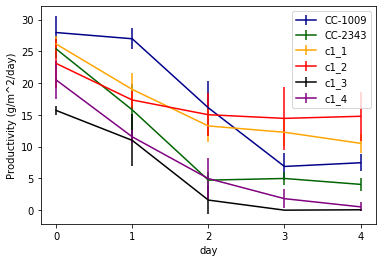

In [4]:
# re-creat the plot in Josh's email

plt.figure()

for strain,color in color_codes.items():
    
    y = df[strain]
    
    # get error data from the column to the right of the strain in question
    yerr = df.iloc[:,list(df.columns).index(strain)+1]
    
    plt.errorbar( x=range(len(y)), y=y, yerr=yerr, color=color, label=strain)

plt.ylabel("Productivity (g/m^2/day)")
plt.xlabel("day")
plt.xticks( range(5))
plt.legend()
plt.show()

In [5]:
# convenient function for the next cell
# given some y-values, get a new set of cumulative y-values

def cumulative( y ):
    return [sum(y[:i+1]) for i in range(len(y))]

# demo
cumulative([10,15,4])

[10, 25, 29]

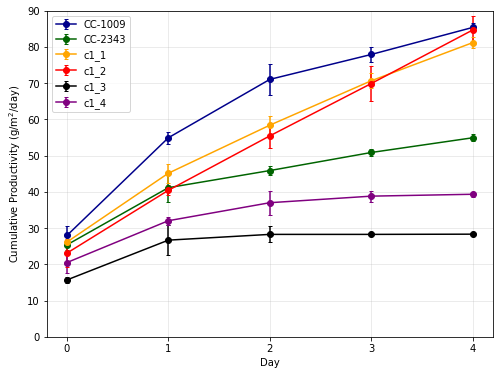

In [7]:
# same as the first plot, but with cumulative y-values

plt.figure(figsize=(8,6))

for strain,color in color_codes.items():
    
    y = cumulative(df[strain])
    
    # get error data from the column to the right of the strain in question
    yerr = df.iloc[:,list(df.columns).index(strain)+1]
    
    plt.errorbar( x=range(len(y)), y=y, yerr=yerr, color=color, label=strain, capsize=2, marker='o')

plt.ylabel("Cumulative Productivity (g/m$\mathregular{^2}$/day)")
plt.xlabel("Day")
plt.xticks(range(5))
plt.ylim(0, 90)
plt.legend()
plt.grid(alpha=0.3)
# plt.savefig('cumulative_productivity.png', dpi=300)
plt.show()